#CVPR Lab 4

Spatial domain filtering and frequency domain filtering high pass and low pass



Spatial Domain Filtering

TypeError: Image data of dtype object cannot be converted to float

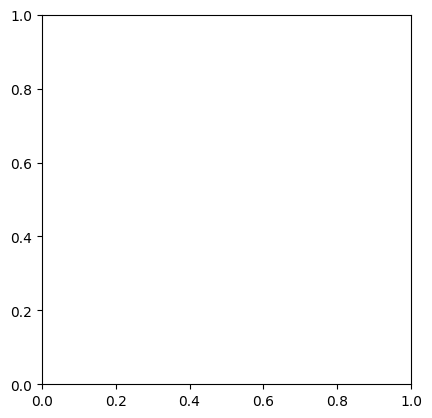

In [ ]:
#Importing Important libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('Sample.jpg', 0)

plt.imshow(image, cmap='gray'), plt.title('Original')

In [ ]:
# Low-pass filter (average blur)
kernel_low_pass = np.ones((5, 5), np.float32) / 25  # 5x5 averaging kernel

# High-pass filter (edge detection)
kernel_high_pass = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]], np.float32)  # Laplacian-like kernel

# Apply spatial domain filtering
img_low_pass = cv2.filter2D(image, -1, kernel_low_pass)  # Low-pass filtering
img_high_pass = cv2.filter2D(image, -1, kernel_high_pass)  # High-pass filtering

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1528: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'


In [ ]:
print(kernel_low_pass)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


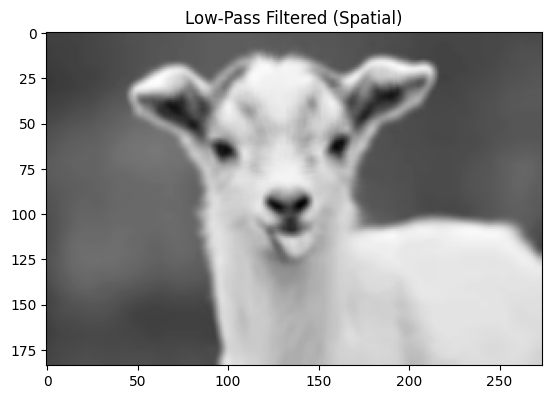

In [ ]:
plt.imshow(img_low_pass, cmap='gray'), plt.title('Low-Pass Filtered (Spatial)')
plt.show()

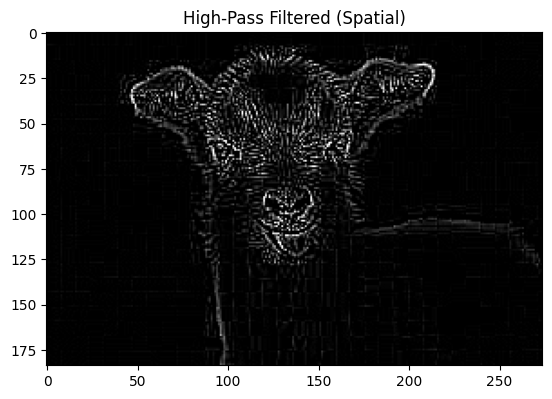

In [ ]:
plt.imshow(img_high_pass, cmap='gray'), plt.title('High-Pass Filtered (Spatial)')
plt.show()

Frequency Domain Filtering

In [ ]:
# Compute Fourier Transform
f = np.fft.fft2(image)
f_shift = np.fft.fftshift(f)  # Shift zero-frequency component to the center

# Create masks for low-pass and high-pass filters
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the frequency domain

# Low-pass filter mask (Gaussian)
mask_low_pass = np.zeros((rows, cols), np.uint8)
mask_low_pass[crow-30:crow+30, ccol-30:ccol+30] = 1  # Allow low frequencies

# High-pass filter mask (1 - low-pass mask)
mask_high_pass = 1 - mask_low_pass  # Allow high frequencies

# Apply filters in the frequency domain
f_shift_low_pass = f_shift * mask_low_pass  # Low-pass filtering
f_shift_high_pass = f_shift * mask_high_pass  # High-pass filtering

# Inverse Fourier Transform to return to spatial domain
f_low_pass = np.fft.ifftshift(f_shift_low_pass)
f_high_pass = np.fft.ifftshift(f_shift_high_pass)
img_low_pass = np.abs(np.fft.ifft2(f_low_pass))
img_high_pass = np.abs(np.fft.ifft2(f_high_pass))

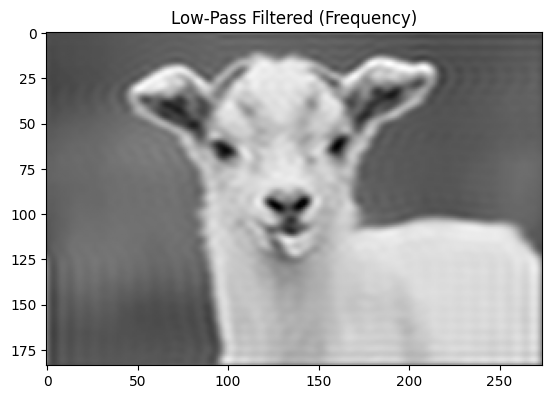

In [ ]:
# Display results
plt.imshow(img_low_pass, cmap='gray'), plt.title('Low-Pass Filtered (Frequency)')
plt.show()

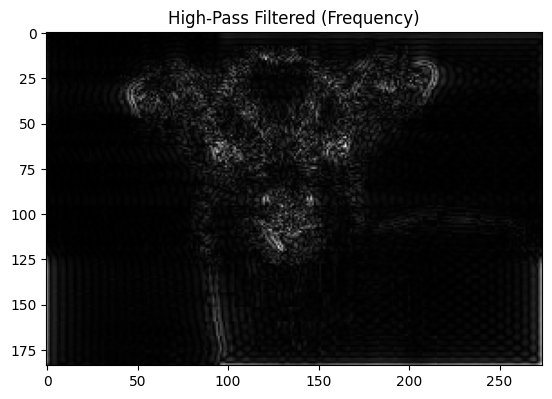

In [ ]:
plt.imshow(img_high_pass, cmap='gray'), plt.title('High-Pass Filtered (Frequency)')
plt.show()

In [ ]:
# prompt: Give me notes on the lines of code above and how the work, what they do.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import necessary libraries: OpenCV (cv2), NumPy (np), and Matplotlib (plt)

# Load image in grayscale
image = cv2.imread('Sample.jpg', 0)
# Reads the image file 'Sample.jpg' in grayscale mode (0).
# The image is stored in the variable 'image'.

plt.imshow(image, cmap='gray'), plt.title('Original')
# Displays the original grayscale image using Matplotlib.
# 'cmap='gray'' specifies grayscale colormap.

# Low-pass filter (average blur)
kernel_low_pass = np.ones((5, 5), np.float32) / 25  # 5x5 averaging kernel
# Creates a 5x5 kernel for a low-pass filter (average blur).
# np.ones creates a 5x5 matrix filled with ones. Dividing by 25 normalizes the kernel.

# High-pass filter (edge detection)
kernel_high_pass = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]], np.float32)  # Laplacian-like kernel
# Creates a 3x3 kernel for a high-pass filter (edge detection), similar to a Laplacian kernel.

# Apply spatial domain filtering
img_low_pass = cv2.filter2D(image, -1, kernel_low_pass)  # Low-pass filtering
# Applies the low-pass filter to the input image using cv2.filter2D.
# -1 means the output image will have the same depth as the input.
img_high_pass = cv2.filter2D(image, -1, kernel_high_pass)  # High-pass filtering
# Applies the high-pass filter to the input image using cv2.filter2D.

plt.imshow(img_low_pass, cmap='gray'), plt.title('Low-Pass Filtered (Spatial)')
plt.show()
# Displays the low-pass filtered image.
plt.imshow(img_high_pass, cmap='gray'), plt.title('High-Pass Filtered (Spatial)')
plt.show()
# Displays the high-pass filtered image.

# Frequency Domain Filtering
# Compute Fourier Transform
f = np.fft.fft2(image)
# Computes the 2D discrete Fourier Transform (DFT) of the image.

f_shift = np.fft.fftshift(f)  # Shift zero-frequency component to the center
# Shifts the zero-frequency component to the center of the spectrum.

# Create masks for low-pass and high-pass filters
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the frequency domain
# Get image dimensions and calculate the center coordinates.


# Low-pass filter mask (Gaussian)
mask_low_pass = np.zeros((rows, cols), np.uint8)
mask_low_pass[crow-30:crow+30, ccol-30:ccol+30] = 1  # Allow low frequencies
# Creates a low-pass mask in the frequency domain. A circular region around the center is set to 1, allowing low frequencies to pass.

# High-pass filter mask (1 - low-pass mask)
mask_high_pass = 1 - mask_low_pass  # Allow high frequencies
# Creates a high-pass mask by inverting the low-pass mask.

# Apply filters in the frequency domain
f_shift_low_pass = f_shift * mask_low_pass  # Low-pass filtering
# Applies the low-pass mask to the shifted frequency spectrum.
f_shift_high_pass = f_shift * mask_high_pass  # High-pass filtering
# Applies the high-pass mask to the shifted frequency spectrum.

# Inverse Fourier Transform to return to spatial domain
f_low_pass = np.fft.ifftshift(f_shift_low_pass)
# Inverse shift to bring the zero frequency component back to the top-left corner
f_high_pass = np.fft.ifftshift(f_shift_high_pass)
# Inverse shift to bring the zero frequency component back to the top-left corner
img_low_pass = np.abs(np.fft.ifft2(f_low_pass))
# Computes the inverse 2D DFT of the low-pass filtered spectrum and takes the absolute value.
img_high_pass = np.abs(np.fft.ifft2(f_high_pass))
# Computes the inverse 2D DFT of the high-pass filtered spectrum and takes the absolute value.

# Display results
plt.imshow(img_low_pass, cmap='gray'), plt.title('Low-Pass Filtered (Frequency)')
plt.show()
# Display the result of low-pass filtering in the frequency domain
plt.imshow(img_high_pass, cmap='gray'), plt.title('High-Pass Filtered (Frequency)')
plt.show()
# Display the result of high-pass filtering in the frequency domain
